In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma,ds,i,c):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    
    plt.subplot(4, 3, i+1)
    plt.plot(points[:,0], points[:,1],'b-.')
    plt.scatter(ds["xp"][:,0],ds["xp"][:,1])
    plt.scatter(ds["xn"][:,0],ds["xn"][:,1],color="red")
    plt.title("C : "+c)


# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

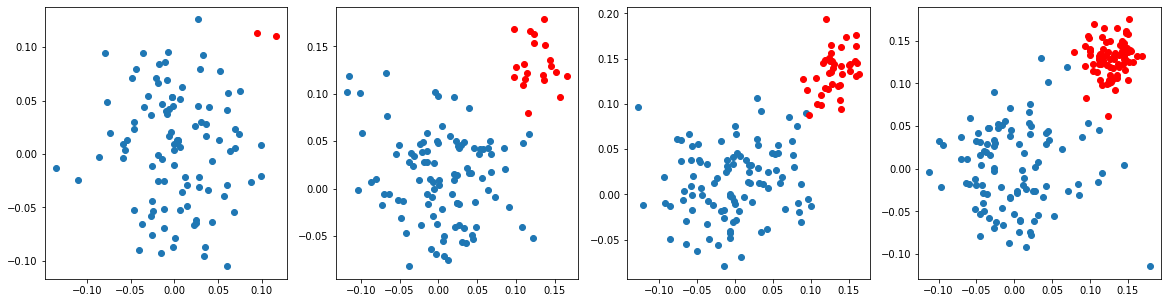

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
datasets = []
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')

    datasets.append({'x':X,'y':y ,"xp":X_p,"xn": X_n,"yp":y_p,"yn":y_n})

plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM



if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

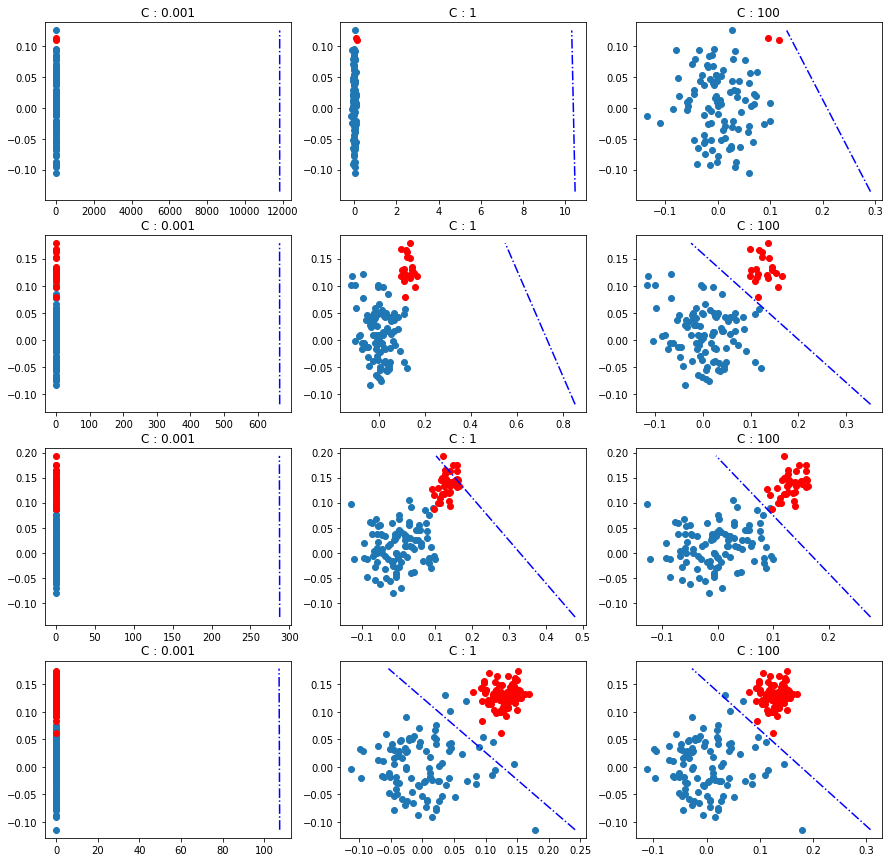

In [4]:
plt.figure(figsize=(15,15))
idx = 0
for _,ds in enumerate(datasets):
  for c_val in [0.001, 1 ,100]:
    clf = SVC(C=c_val,kernel="linear").fit(ds["x"],ds["y"])
    draw_line(clf.coef_[0],clf.intercept_[0], np.amin(ds["x"]), np.amax(ds["x"]),ds,idx,str(c_val))
    idx += 1

## Task 2: Applying LR

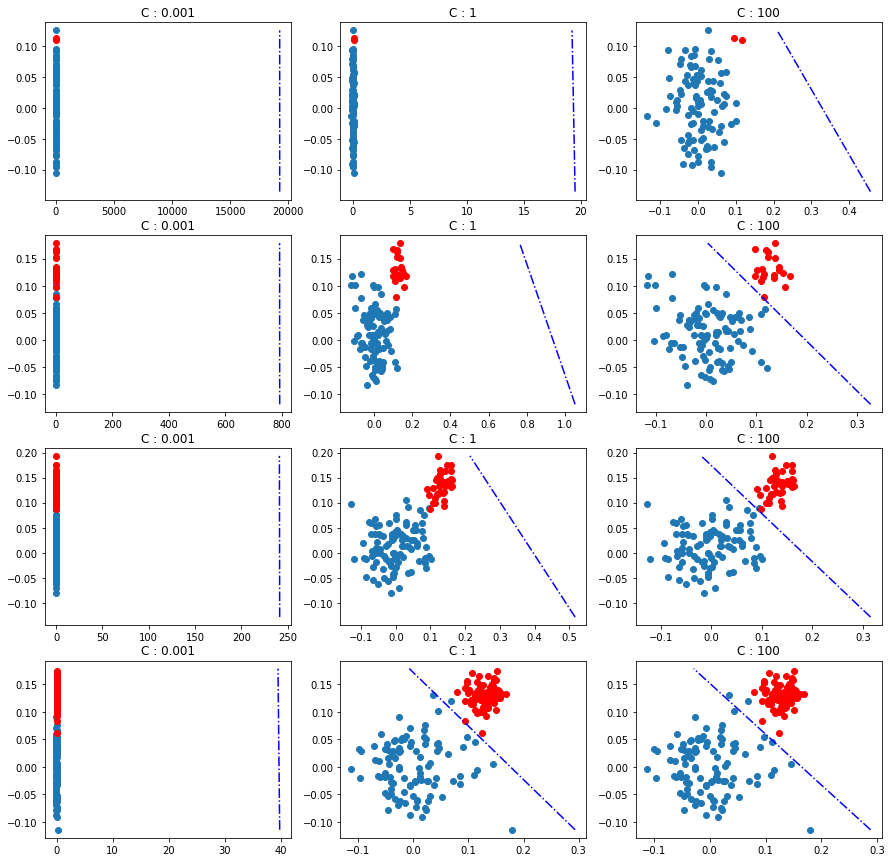

In [5]:
plt.figure(figsize=(15,15))
idx = 0
for _,ds in enumerate(datasets):
  for c_val in [0.001, 1 ,100]:
    clf = LogisticRegression(C=c_val).fit(ds["x"],ds["y"])
    draw_line(clf.coef_[0],clf.intercept_[0], np.amin(ds["x"]), np.amax(ds["x"]),ds,idx,str(c_val))
    idx += 1

From the formulation of SVC we know that it tries to minimise the margin and penalise incorrect classifications. C acts as a regularization term which indicates the penalty given to incorrect classifications.

In all cases for C=0.001 as regularization term is very small, it penalizes errors very little and hence we dont get a good hyperplane.

 - **Case 1** (100:2)
As data is highly imbalanced, the 2 points dont make much difference even if they are incorrectly classified. For C = 0.001 and 1 as penalty is very less the hyperplane is very far away. For C=100 as we penalize the incorrect classifications, the hyperplane is better than previous cases but due to very small of incorrect classification due to imbalance it still cant seperate the classes

- **Case 2** (100:20)
In this case we have 20 points belonging to red class which is more than the red points in case 1. Still they are significantly lower than the blue points. So, For C = 0.001 and 1 as penalty is very less the hyperplane is still far away. For C=100 as we increase the regularization term we get a better hyperplane which seperates the dataset very well except for one red point

- **Case 3** (100:40)
Here as dataset is less imbalanced compared to previous cases, C=1 tries to fit a hyperplane but with significant errors for red points. C=100 gives a good hyperplane with fewer errors

- **Case 4:** (100:80)
Here, the dataset is almost balanced, hence we get better results with SVC. C=1 yields a good hyperplane and c=100 reduces error further. As the value of regularization param i.e C increased and also the points were almost balanced, the incorrect classifications were penalized more and thus the model adjusted its hyperplane nearer to a optimal hyperplane